In [49]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import gmaps
import math

# Statmodels & patsy
import patsy
import statsmodels.api as sm

gmaps.configure(api_key="")

In [4]:
df_original = pd.read_csv("all-crashes2004-2016.csv")

C:\Users\Charles\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (79,183) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df_original

,CRASH_CRN,DISTRICT,CRASH_COUNTY,MUNICIPALITY,POLICE_AGCY,CRASH_YEAR,CRASH_MONTH,DAY_OF_WEEK,TIME_OF_DAY,HOUR_OF_DAY,...,ACCESS_CTRL,ROADWAY_COUNTY,LANE_COUNT,RDWY_ORIENT,ROAD_OWNER,ROUTE,SPEED_LIMIT,SEGMENT,OFFSET,STREET_NAME
0,2.004000e+09,11.0,2.0,2454.0,02454,2004.0,1.0,5.0,257.0,2.0,...,3.0,2.0,2.0,E,2.0,2032,35.0,10.0,1000.0,LEWIS RUN RD
1,2.004000e+09,11.0,2.0,2440.0,02440,2004.0,1.0,5.0,1027.0,10.0,...,NaN,2.0,2.0,W,3.0,NaN,35.0,NaN,NaN,COAL VALLEY RD
2,2.004000e+09,11.0,2.0,2203.0,02203,2004.0,1.0,5.0,1839.0,18.0,...,NaN,2.0,2.0,W,2.0,3082,35.0,NaN,NaN,CLINTON FRANKFORT RD
3,2.004000e+09,11.0,2.0,2404.0,02404,2004.0,1.0,6.0,914.0,9.0,...,NaN,2.0,2.0,N,4.0,NaN,25.0,NaN,NaN,NORTH BALPH AV
4,2.004000e+09,11.0,2.0,2419.0,02419,2004.0,1.0,5.0,2230.0,22.0,...,NaN,2.0,2.0,S,4.0,NaN,20.0,NaN,NaN,THORNBERRY DR
5,2.004000e+09,11.0,2.0,2111.0,02111,2004.0,1.0,6.0,1415.0,14.0,...,NaN,2.0,3.0,N,4.0,NaN,25.0,NaN,NaN,WARREN DR
6,2.004000e+09,11.0,2.0,2435.0,02435,2004.0,1.0,6.0,1430.0,14.0,...,NaN,2.0,3.0,E,4.0,NaN,30.0,NaN,NaN,POPLAR ST
7,2.004000e+09,11.0,2.0,2440.0,02440,2004.0,1.0,7.0,847.0,8.0,...,NaN,2.0,4.0,N,2.0,0051,40.0,NaN,NaN,NaN
8,2.004000e+09,11.0,2.0,2454.0,02454,2004.0,1.0,7.0,1244.0,12.0,...,NaN,2.0,4.0,N,2.0,0051,40.0,NaN,NaN,CLAIRTON BL
9,2.004000e+09,11.0,2.0,2438.0,02438,2004.0,1.0,1.0,1150.0,11.0,...,NaN,2.0,2.0,N,4.0,NaN,25.0,NaN,NaN,AMITY ST


In [6]:
category_time = ["CRASH_YEAR", "CRASH_MONTH", "TIME_OF_DAY", "HOUR_OF_DAY"]

category_conditions = ["ILLUMINATION", "WEATHER", "ROAD_CONDITION"]

category_type = ["COLLISION_TYPE", "URBAN_RURAL"]

category_people_count = ["PERSON_COUNT", "VEHICLE_COUNT"] 

category_injury = ["FATAL_COUNT", "INJURY_COUNT", "MAJ_INJ_COUNT", "MOD_INJ_COUNT", "MIN_INJ_COUNT", \
                   "UNK_INJ_DEG_COUNT", "MAX_SEVERITY_LEVEL"]

category_belt = ["UNBELTED", "UNBELTED_OCC_COUNT", "UNB_DEATH_COUNT", "UNB_MAJ_INJ_COUNT", "BELTED_DEATH_COUNT", \
                 "BELTED_MAJ_INJ_COUNT"]

category_age = ["DRIVER_COUNT_16YR", "DRIVER_COUNT_17YR", "DRIVER_COUNT_18YR", "DRIVER_COUNT_19YR", \
                "DRIVER_COUNT_20YR", "DRIVER_COUNT_50_64YR", "DRIVER_COUNT_65_74YR", "DRIVER_COUNT_75PLUS"]

category_location = ["LATITUDE", "LONGITUDE", "DEC_LAT", "DEC_LONG", "STREET_NAME"]

category_alcohol = ["ALCOHOL_RELATED", "DRINKING_DRIVER", "UNDERAGE_DRNK_DRV", "IMPAIRED_DRIVER"]

category_attention = ["CELL_PHONE", "DISTRACTED", "FATIGUE_ASLEEP"]

category_speed = ["LIMIT_65MPH", "SPEEDING", "SPEEDING_RELATED", "AGGRESSIVE_DRIVING"]


categories_all = category_time + category_conditions + category_type + category_people_count + \
                category_injury + category_belt + category_age + category_location + \
                category_alcohol + category_attention + category_speed

df_trimmed = df_original[categories_all]

In [7]:
df_trimmed.dropna()
df_trimmed['MAX_SEVERITY_LEVEL']

,CRASH_YEAR,CRASH_MONTH,TIME_OF_DAY,HOUR_OF_DAY,ILLUMINATION,WEATHER,ROAD_CONDITION,COLLISION_TYPE,URBAN_RURAL,PERSON_COUNT,...,DRINKING_DRIVER,UNDERAGE_DRNK_DRV,IMPAIRED_DRIVER,CELL_PHONE,DISTRACTED,FATIGUE_ASLEEP,LIMIT_65MPH,SPEEDING,SPEEDING_RELATED,AGGRESSIVE_DRIVING
1,2004.0,1.0,1027.0,10.0,1.0,1.0,6.0,7.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2004.0,1.0,1839.0,18.0,2.0,1.0,0.0,7.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,2004.0,1.0,1430.0,14.0,1.0,1.0,0.0,1.0,3.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
11,2004.0,1.0,1920.0,19.0,3.0,2.0,1.0,2.0,3.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14,2004.0,1.0,945.0,9.0,1.0,2.0,1.0,1.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,2004.0,1.0,1643.0,16.0,1.0,1.0,0.0,4.0,3.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
17,2004.0,1.0,341.0,3.0,2.0,2.0,1.0,7.0,3.0,2.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
18,2004.0,1.0,611.0,6.0,2.0,1.0,0.0,1.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19,2004.0,1.0,1240.0,12.0,1.0,1.0,0.0,4.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20,2004.0,1.0,902.0,9.0,1.0,4.0,1.0,7.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df_location=df_trimmed[category_location]
df_location_dec = df_location[['DEC_LAT','DEC_LONG']]
loc_series = df_location_dec.as_matrix(['DEC_LAT','DEC_LONG'])
loc_list=[]

for i in loc_series:
    if( not math.isnan(i[0]) and not math.isnan(i[1])):
        loc_list.append((i[0],i[1]))

fig = gmaps.figure()
heatmap_layer = gmaps.heatmap_layer(loc_list)
fig.add_layer(heatmap_layer)
fig

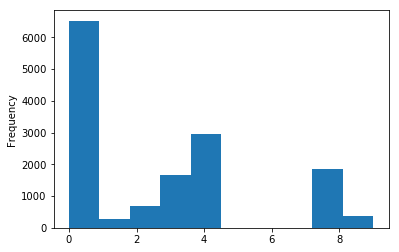

In [46]:
df_isDrunk = df_trimmed[category_alcohol+category_injury]
df_isDrunk = df_isDrunk[["DRINKING_DRIVER","MAX_SEVERITY_LEVEL"]]
df_isDrunk = df_isDrunk["MAX_SEVERITY_LEVEL"]
df_Drunk = df_isDrunk[df_isDrunk["DRINKING_DRIVER"]==1]
df_NotDrunk = df_isDrunk[df_isDrunk["DRINKING_DRIVER"]==0]

graphDrunk = df_Drunk["MAX_SEVERITY_LEVEL"].plot.hist()
graphDrunk.figure


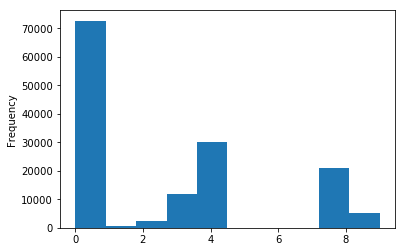

In [48]:
graphDrunk.clear()
graphNotDrunk = df_NotDrunk["MAX_SEVERITY_LEVEL"].plot.hist()
graphNotDrunk.figure
graphNotDrunk.clear()

In [57]:
outcome, predictors = patsy.dmatrices('MAX_SEVERITY_LEVEL ~ DRINKING_DRIVER ', df_isDrunk)
# Use statsmodels to intialize the OLS model
mod = sm.OLS(outcome, predictors)

# Fit the model
res = mod.fit()

print(res.summary())


                            OLS Regression Results                            
Dep. Variable:     MAX_SEVERITY_LEVEL   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     6.825
Date:                Mon, 12 Jun 2017   Prob (F-statistic):            0.00899
Time:                        17:06:30   Log-Likelihood:            -4.0180e+05
No. Observations:              157821   AIC:                         8.036e+05
Df Residuals:                  157819   BIC:                         8.036e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept           2.6212      0.008    3

In [73]:
df_weather = df_trimmed[category_conditions+category_injury]

df_weather = df_weather[['WEATHER','MAX_SEVERITY_LEVEL']]

df_weather = df_weather[df_weather['MAX_SEVERITY_LEVEL']<=4] # severity level 8-9 is unknown

df_weather_mean=[]

df_weather_1_mean =  df_weather[df_weather['WEATHER']==1]['MAX_SEVERITY_LEVEL'].mean() 

df_weather_2_mean =  df_weather[df_weather['WEATHER']==2]['MAX_SEVERITY_LEVEL'].mean() #rain

df_weather_3_mean =  df_weather[df_weather['WEATHER']==3]['MAX_SEVERITY_LEVEL'].mean() #hail

df_weather_4_mean =  df_weather[df_weather['WEATHER']==4]['MAX_SEVERITY_LEVEL'].mean() #snow

df_weather_5_mean =  df_weather[df_weather['WEATHER']==5]['MAX_SEVERITY_LEVEL'].mean() #fog

df_weather_6_mean =  df_weather[df_weather['WEATHER']==6]['MAX_SEVERITY_LEVEL'].mean() #rain and fog

df_weather_7_mean =  df_weather[df_weather['WEATHER']==7]['MAX_SEVERITY_LEVEL'].mean() #hail and fog

df_weather_mean.append(df_weather_1_mean)
df_weather_mean.append(df_weather_2_mean)
df_weather_mean.append(df_weather_3_mean)
df_weather_mean.append(df_weather_4_mean)
df_weather_mean.append(df_weather_5_mean)
df_weather_mean.append(df_weather_6_mean)
df_weather_mean.append(df_weather_7_mean)

df_weather_mean

[1.4378734885580093,
 1.3327541268462206,
 0.9726708074534162,
 0.9966935719148109,
 1.2714776632302405,
 1.3463687150837989,
 1.3]